In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
test=pd.read_csv('Test.csv')
train=pd.read_csv('Train.csv')

So, lets  create a baseline submission file, concentratino on the format, rather than the actual machine learning. 

First, we collect the rownames of the soon-to-be submission file

In [2]:
rownames= test['objectId'].tolist()

Then, makin sure we use unicode everywhere...

In [3]:
def create_unicode(text):
    return text.decode('utf-8')
train['product_uni']= train['product'].apply(create_unicode)

product_names_uni=train['product_uni'].value_counts().index.tolist()
type(product_names_uni[0])

unicode

Lets use our recently aquired knowledge on datetime to filter the training dataset. In this example, we want to create our submission based on training data onll form the months after may. 

In [4]:
import datetime
def convert_time(date_string):
    return  datetime.datetime.strptime(date_string, '%Y-%m-%dT%H:%M:%S.%fZ')

train['datetime']=train['createdAt'].apply(convert_time)
train['month']= train['datetime'].apply(lambda x: x.month)

What is the distribution of the newly creates month column?

In [5]:
train.month.value_counts()

4    5205
1    2903
5    2890
8    2849
6    2288
7    2225
3    2091
2    1845
Name: month, dtype: int64

Doing the actual filtering:

In [8]:
filtered_train=train.loc[train.month >6]
filtered_train.head(5)

,owner.objectId,cetliId.objectId,objectId,product,quantity,createdAt,updatedAt,selected,deleted,crossedOutLocation.latitude,crossedOutLocation.longitude,product_uni,datetime,month
2,nlslMwDjE5,ARt36Dh1Oa,hXi0olUEAF,liszt,1,2016-07-30T08:57:19.444Z,2016-08-07T09:08:00.002Z,1,1,null,null,liszt,2016-07-30 08:57:19.444,7
7,wTWAFk66Eh,lsiPcwCTYs,hnByTGmFZz,szalvéta,1,2016-08-15T08:17:16.733Z,2016-08-19T12:45:43.374Z,0,1,null,null,szalvéta,2016-08-15 08:17:16.733,8
15,Z7MldVzFnN,2JMRDx90HK,7vcQvaq377,öblítő,1,2016-07-30T11:23:52.565Z,2016-08-05T20:08:22.860Z,0,1,null,null,öblítő,2016-07-30 11:23:52.565,7
18,boYCFnqBR3,whjjmVL1EZ,8ALz8OXpBs,málna,2,2016-07-02T06:14:04.040Z,2016-07-02T06:14:04.040Z,0,null,null,null,málna,2016-07-02 06:14:04.040,7
19,eEbuLkHpQG,tju9qVFO1n,57HYnNT89k,tej,1,2016-07-02T05:03:44.207Z,2016-07-12T20:12:07.513Z,0,1,null,null,tej,2016-07-02 05:03:44.207,7


What are the frequencies in the filtered column?

In [9]:
filtered_train['product_uni'].value_counts()

tej                       239
kenyér                    205
sajt                      159
tejföl                    138
tojás                     132
hagyma                    118
ásványvíz                 117
burgonya                  117
paradicsom                111
wc papír                  108
felvágott                 103
vaj                        75
joghurt                    72
olaj                       63
paprika                    63
tusfürdő                   62
öblítő                     58
uborka                     57
kávé                       56
liszt                      54
gyümölcs                   54
fogkrém                    54
kukás zsák                 53
csirkemell                 53
papírtörlő                 53
virsli                     48
darált hús                 47
üdítő                      47
szalámi                    46
mosópor                    42
                         ... 
tarja                       2
erős paprika                2
száraz tör

lets plot the distribution of  these frequency numbers, just because we can.

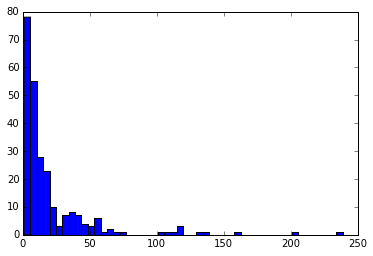

In [16]:
freq_counts=filtered_train['product_uni'].value_counts()
plt.hist(freq_counts, bins=50)
plt.show()

In the sample submission in every row we want to "predict" this distribution. In other words:for every product we want to predict simply its frequency. First we need an empty dataframe with the rigth  rownames and column names.  

In [17]:
submission= pd.DataFrame(0,index=rownames, columns=product_names_uni)

Ce now create a list of number which will represent our prediction for every line. Note, that not every product are represented in the frequency list, (because of the filtering ) for those, we can insert an "average" number, say 15.  

In [18]:
numbers=[]
for prod in product_names_uni:
    if prod in freq_counts.index:
        numbers.extend([freq_counts[prod]])
    else:
        numbers.extend([15])
        

now pushing this number list inte every row of our submission dataframe.

In [19]:
for obj_id in rownames:
    submission.loc[obj_id] = numbers

In [20]:
submission.head(5)

,tej,kenyér,sajt,tejföl,tojás,ásványvíz,felvágott,wc papír,hagyma,paradicsom,...,körömkefe,köles,rovarirtó,orrspray,torta,tonic,pepsi,szennyes zacskó,unicum,tönkölyös rúd
ZlAFjm45Bd,239,205,159,138,132,117,103,108,118,111,...,15,15,1,15,15,1,1,1,15,1
A8F6RYfsoT,239,205,159,138,132,117,103,108,118,111,...,15,15,1,15,15,1,1,1,15,1
ZlfbXyyznT,239,205,159,138,132,117,103,108,118,111,...,15,15,1,15,15,1,1,1,15,1
72Imeo68mP,239,205,159,138,132,117,103,108,118,111,...,15,15,1,15,15,1,1,1,15,1
lnTCMLqxTB,239,205,159,138,132,117,103,108,118,111,...,15,15,1,15,15,1,1,1,15,1


In [ ]:
some minor adjustment to have a properly formed csv

In [67]:
submission_to_export= submission.reset_index().rename(columns={'index': 'objectId'})
submission_to_export.to_csv('workshop_submission.csv', encoding=('utf-8'), index=False)

Dont forget the 'utf-8'encoding! 